In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from datetime import datetime
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set visualization style
sns.set(style='whitegrid')

# Load the datasets

In [3]:
creditcard_path = '../data/raw/creditcard.csv'
fraud_data_path = '../data/raw/Fraud_Data.csv'
ip_country_path = '../data/raw/IpAddress_to_Country.csv'

In [4]:
# Load datasets
creditcard_data = pd.read_csv(creditcard_path)
fraud_data = pd.read_csv(fraud_data_path)
ip_data = pd.read_csv(ip_country_path)


### Descriptive analysis

In [5]:
data = {'creditcard_data': creditcard_data, 'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} shape: {data_df.shape}")

    

creditcard_data shape: (284807, 31)
fraud_data shape: (151112, 11)
ip_data shape: (138846, 3)


###### Fraud_Data.csv contains 151,112 entries with 11 columns.
###### IpAddress_to_Country.csv contains 138,846 entries with 3 columns.
###### creditcard.csv contains 284,807 entries and 31 columns.

In [6]:
data = {'creditcard_data': creditcard_data, 'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} info:")
    print(data_df.info())
    print("\n")

creditcard_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [7]:
data = {'creditcard_data': creditcard_data, 'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} describe:")
    print(data_df.describe())
    print("\n")

creditcard_data describe:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e

In [8]:
data = {'creditcard_data': creditcard_data, 'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} Missing Values:")
    print(data_df.isnull().sum())
    print("\n")

creditcard_data Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


fraud_data Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


ip_data Missing Values:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64




In [9]:
data = {'creditcard_data': creditcard_data, 'fraud_data': fraud_data, 'ip_data': ip_data}
for data_name, data_df in data.items():
    print(f"{data_name} duplicated values:")
    print(data_df.duplicated().sum())
    print("\n")

creditcard_data duplicated values:
1081


fraud_data duplicated values:
0


ip_data duplicated values:
0




##### I will Start will data cleanin now
###### signup_time and purchase_time are stored as strings instead of datetime.
###### ip_address is stored as a float, which should be converted to an integer.

In [12]:
#Data Cleaning
# Convert time columns to datetime format 
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])  
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert IP address-related columns to integers
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(int)
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)

In [13]:
# Removing dupplicated from creditcard_data
creditcard_data = creditcard_data.drop_duplicates()

#### Exploratory Data Analysis (EDA)

##### Univariate Analysis
###### Distribution of numerical and categorical features.

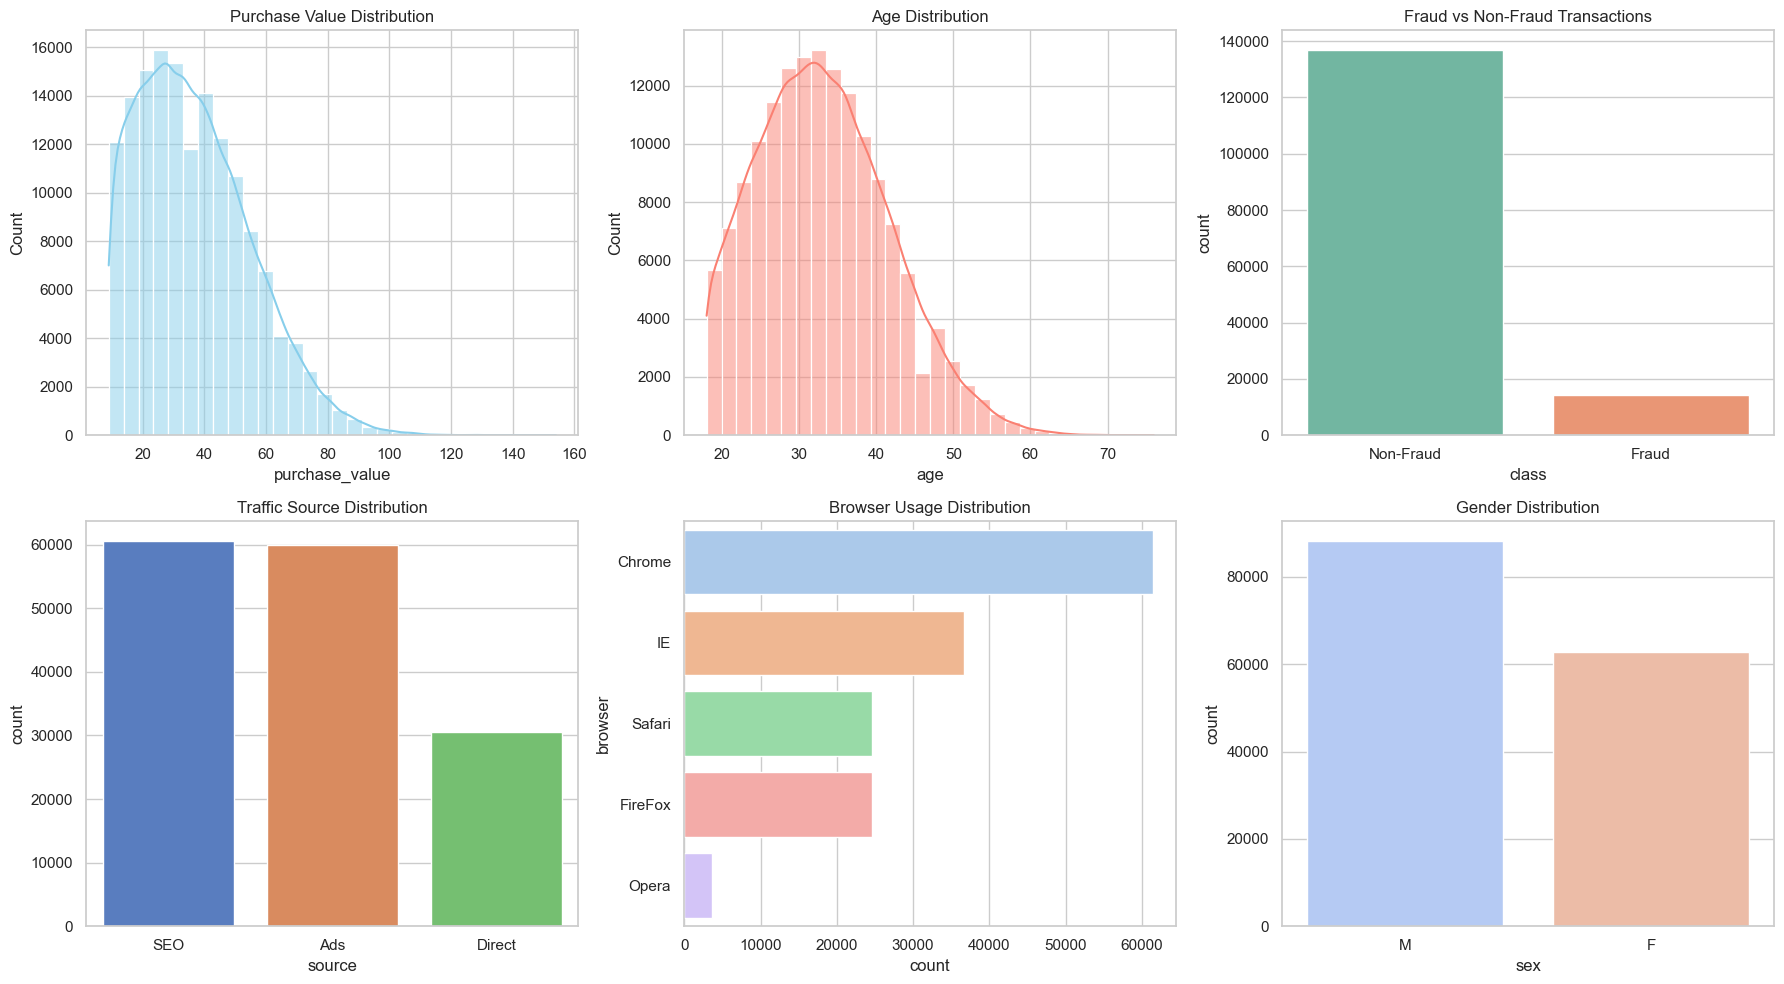

In [14]:
# Univariate Analysis: Plot distributions for numerical variables
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Purchase Value Distribution
sns.histplot(fraud_data['purchase_value'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Purchase Value Distribution')

# Age Distribution
sns.histplot(fraud_data['age'], bins=30, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Age Distribution')

# Class Distribution (Fraud vs Non-Fraud)
sns.countplot(x='class', data=fraud_data, ax=axs[0, 2], palette='Set2')
axs[0, 2].set_title('Fraud vs Non-Fraud Transactions')
axs[0, 2].set_xticklabels(['Non-Fraud', 'Fraud'])

# Source Distribution
sns.countplot(x='source', data=fraud_data, ax=axs[1, 0], palette='muted')
axs[1, 0].set_title('Traffic Source Distribution')

# Browser Distribution
sns.countplot(y='browser', data=fraud_data, order=fraud_data['browser'].value_counts().index, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Browser Usage Distribution')

# Gender Distribution
sns.countplot(x='sex', data=fraud_data, ax=axs[1, 2], palette='coolwarm')
axs[1, 2].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

### Bi variate Analysis

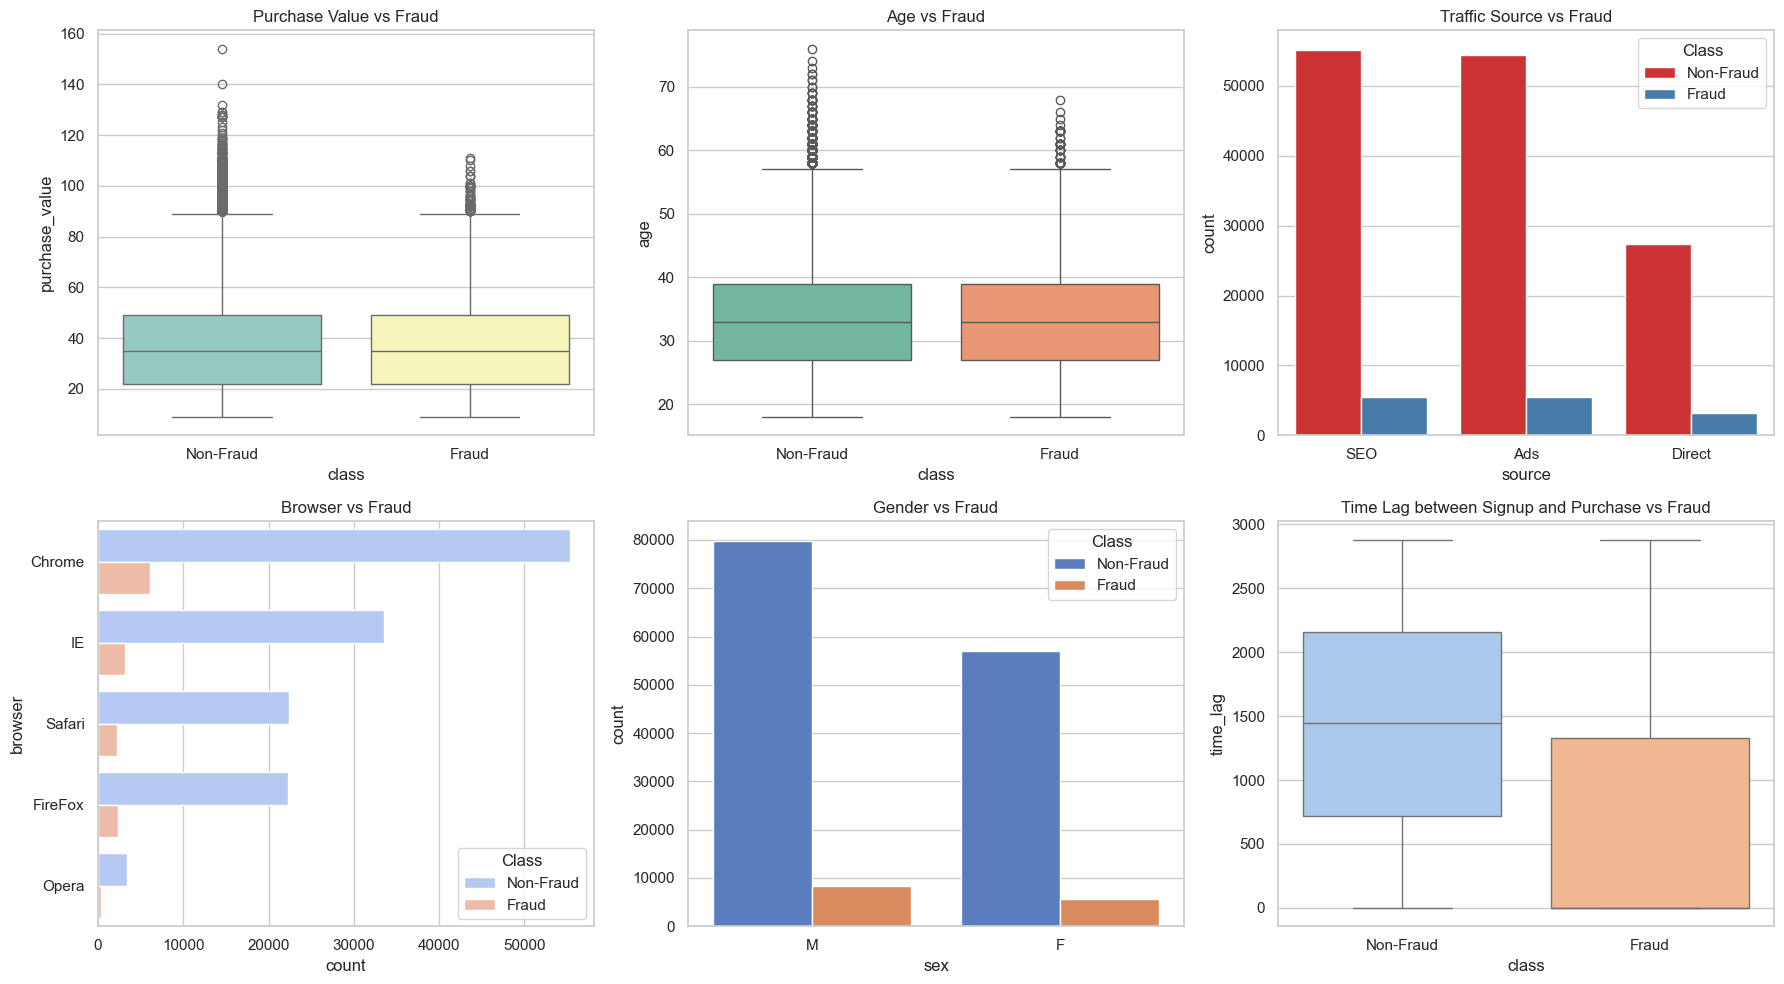

In [15]:
# Bivariate Analysis: Exploring relationships between features and fraud occurrence
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Purchase Value vs Fraud
sns.boxplot(x='class', y='purchase_value', data=fraud_data, ax=axs[0, 0], palette='Set3')
axs[0, 0].set_title('Purchase Value vs Fraud')
axs[0, 0].set_xticklabels(['Non-Fraud', 'Fraud'])

# Age vs Fraud
sns.boxplot(x='class', y='age', data=fraud_data, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title('Age vs Fraud')
axs[0, 1].set_xticklabels(['Non-Fraud', 'Fraud'])

# Source vs Fraud
sns.countplot(x='source', hue='class', data=fraud_data, ax=axs[0, 2], palette='Set1')
axs[0, 2].set_title('Traffic Source vs Fraud')
axs[0, 2].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Browser vs Fraud
sns.countplot(y='browser', hue='class', data=fraud_data, order=fraud_data['browser'].value_counts().index, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Browser vs Fraud')
axs[1, 0].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Gender vs Fraud
sns.countplot(x='sex', hue='class', data=fraud_data, ax=axs[1, 1], palette='muted')
axs[1, 1].set_title('Gender vs Fraud')
axs[1, 1].legend(title='Class', labels=['Non-Fraud', 'Fraud'])

# Purchase Time Lag (Time between signup and purchase) vs Fraud
fraud_data['time_lag'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600  # in hours
sns.boxplot(x='class', y='time_lag', data=fraud_data, ax=axs[1, 2], palette='pastel')
axs[1, 2].set_title('Time Lag between Signup and Purchase vs Fraud')
axs[1, 2].set_xticklabels(['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


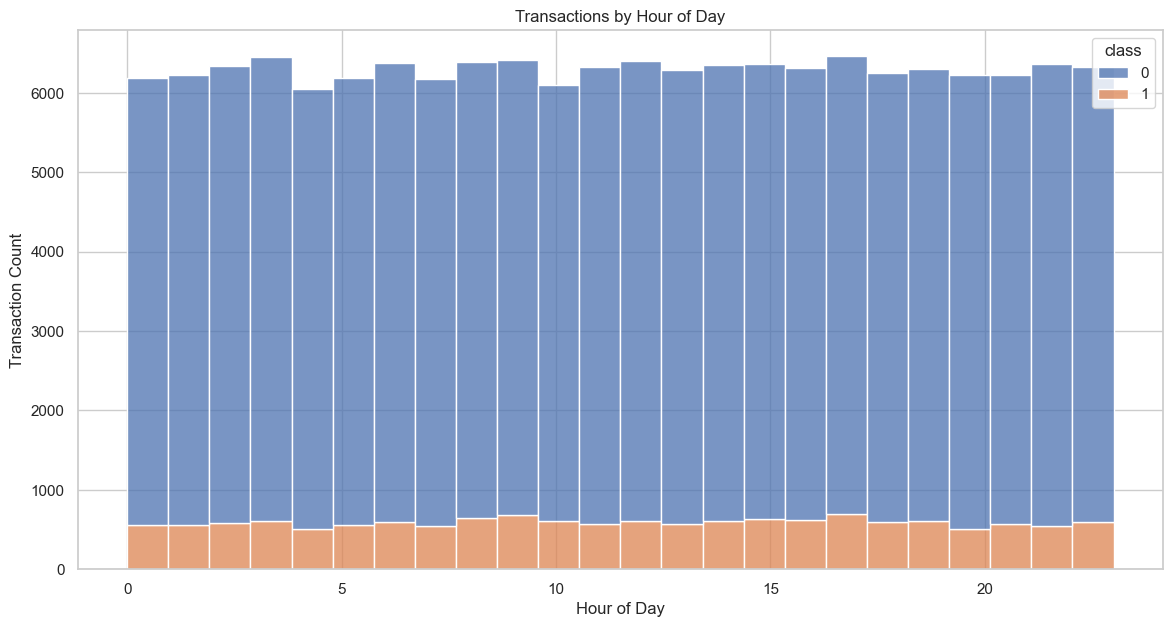

In [16]:
if 'purchase_time' in fraud_data.columns:
    plt.figure(figsize=(14, 7))
    fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
    sns.histplot(fraud_data, x='hour_of_day', hue='class', multiple='stack', bins=24)
    plt.title('Transactions by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Transaction Count')
    plt.show()

In [21]:
fraud_data= fraud_data.drop(columns=['hour_of_day', 'time_lag'])

In [22]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

### Merging the two datasets
Let's merge the datasets to enrich the fraud data with country information based on IP addresses.

### Approach:
We'll match each ip_address in Fraud_Data.csv to the appropriate IP range (lower_bound_ip_address to upper_bound_ip_address) in IpAddress_to_Country.csv.
After merging, we'll analyze if certain countries show higher fraud rates.

In [28]:
# IP range mapping for geolocation
ip_data = ip_data.sort_values('lower_bound_ip_address').reset_index(drop=True)
fraud_data = fraud_data.sort_values('ip_address').reset_index(drop=True)
merged_data = pd.merge_asof(fraud_data, ip_data, left_on='ip_address', right_on='lower_bound_ip_address', direction='backward')
merged_data = merged_data[(merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) & 
                          (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])]
merged_data['country'] = merged_data['country'].fillna('Unknown')

In [29]:
merged_data.columns.to_list()

['user_id',
 'signup_time',
 'purchase_time',
 'purchase_value',
 'device_id',
 'source',
 'browser',
 'sex',
 'age',
 'ip_address',
 'class',
 'lower_bound_ip_address',
 'upper_bound_ip_address',
 'country']

In [33]:
mismatch = merged_data[merged_data['ip_address'] != merged_data['upper_bound_ip_address'] ]
print(f"Number of IP addresses that do not match the IP range: {mismatch.shape[0]}")

Number of IP addresses that do not match the IP range: 148848


In [36]:
merged_data[['ip_address', 'country']].head()

,ip_address,country
0,-2147483648,Germany
1,-2147483648,Germany
2,-2147483648,Germany
3,-2147483648,Germany
4,-2147483648,Germany


In [37]:
merged_data['country'].value_counts()

country
Germany           77812
United States     34447
China              8517
Japan              3449
United Kingdom     3051
                  ...  
Burkina Faso          1
Guadeloupe            1
Niger                 1
Reunion               1
Maldives              1
Name: count, Length: 141, dtype: int64

The IP addresses have been successfully mapped to their respective countries. Unmatched IPs are labeled as 'Unknown'.

### geolocation analysis 

In [ ]:
# Geolocation Analysis: Fraud rate by country
fraud_by_country = merged_data.groupby('country')['class'].agg(['count', 'sum'])
fraud_by_country['fraud_rate'] = fraud_by_country['sum'] / fraud_by_country['count'] * 100
fraud_by_country = fraud_by_country.sort_values('fraud_rate', ascending=False).head(10)  # Top 10 countries by fraud rate

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_country.index, y=fraud_by_country['fraud_rate'], palette='viridis')
plt.title('Top 10 Countries by Fraud Rate')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


Certain countries exhibit significantly higher fraud rates compared to others.
This could point to regional patterns in fraudulent activity, useful for flagging high-risk transactions.

### feature Engineering

In [38]:
# Feature Engineering

# Calculate the total number of transactions for each user
# The 'transform' function applies the 'count' operation to each group of 'user_id'
# and returns a Series with the same index as 'merged_data'.
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# Sort the DataFrame by 'user_id' and 'purchase_time' to ensure that the previous purchase time can be accurately referenced
merged_data = merged_data.sort_values(['user_id', 'purchase_time'])

# Create a new column 'prev_purchase_time' that captures the purchase time of the previous transaction for each user
# The 'shift(1)' function shifts the 'purchase_time' values down by one position within each user group.
merged_data['prev_purchase_time'] = merged_data.groupby('user_id')['purchase_time'].shift(1)

# Calculate 'transaction_velocity_hours', which measures the time between consecutive transactions in hours
# The difference between 'purchase_time' and 'prev_purchase_time' is calculated, converted to seconds,
# and then divided by 3600 to convert to hours.
merged_data['transaction_velocity_hours'] = (merged_data['purchase_time'] - merged_data['prev_purchase_time']).dt.total_seconds() / 3600

# Fill any NaN values in 'transaction_velocity_hours' with -1 to indicate no previous transaction
merged_data['transaction_velocity_hours'] = merged_data['transaction_velocity_hours'].fillna(-1)

# Extract the hour of the day from the 'purchase_time' and create a new column 'hour_of_day'
# This can be useful for analyzing trends in purchases based on the time of day.
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

# Extract the day of the week from the 'purchase_time' and create a new column 'day_of_week'
# The 'dayofweek' attribute returns an integer representation of the day (0=Monday, 6=Sunday)
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

### Final Step: Normalization and Encoding 🛠️

In [40]:
# Select features for normalization
num_features = ['purchase_value', 'age', 'transaction_count', 'transaction_velocity_hours']
scaler = MinMaxScaler()
merged_data[num_features] = scaler.fit_transform(merged_data[num_features])


# Select categorical features for encoding
cat_features = ['source', 'browser', 'sex']
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity

# Perform encoding
encoded_cat = encoder.fit_transform(merged_data[cat_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features))

# Using label encoder for country
le = LabelEncoder()
merged_data['country_encoded'] = le.fit_transform(merged_data['country'])



# Combine with the original data
final_data = pd.concat([merged_data.reset_index(drop=True), encoded_cat_df], axis=1)

# Drop the original categorical columns and other unnecessary columns
final_data = final_data.drop(columns=cat_features + ['country', 'user_id', 'signup_time', 'purchase_time', 'prev_purchase_time', 'lower_bound_ip_address', 'upper_bound_ip_address'])
# Display the first few rows of the final dataset
final_data.head()



,purchase_value,device_id,age,ip_address,class,transaction_count,transaction_velocity_hours,hour_of_day,day_of_week,country_encoded,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,0.310345,FGBQNDNBETFJJ,0.120690,880217484,0,0.0,0.0,10,5,136,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.220690,MKFUIVOHLJBYN,0.344828,-2147483648,0,0.0,0.0,21,5,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.262069,SCQGQALXBUQZJ,0.120690,356056736,0,0.0,0.0,11,3,136,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.179310,MSNWCFEHKTIOY,0.017241,-2147483648,0,0.0,0.0,20,2,45,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.000000,FROZWSSWOHZBE,0.241379,578312545,0,0.0,0.0,12,3,136,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Numerical Features (purchase_value, age, transaction_count, transaction_velocity_hours) are now scaled between 0 and 1.

Categorical Features (source, browser, sex, country) are successfully One-Hot Encoded.

In [19]:
final_data.to_csv('../data/processed/final_data.csv', index=False)